In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
def reefBoatCount():
    sourceData = pd.read_csv("C:/Users/maalbino/Documents/project_dev/Reefs/ReefsAerialSurvey_boatcount.csv")
    sourceData['Date'] = pd.to_datetime(sourceData['Date'], format='%m/%d/%Y')
    sourceData.rename(columns={'Number of Boats':'NumberOfBoats','Reef ':'Reef', 'Boat Type':'BoatType'},inplace=True)
    return sourceData

In [8]:
#get source data
#read data to dataframe    
boatCount = reefBoatCount()
boatCount.head(n=10)

,Reef,Date,BoatType,NumberOfBoats
0,Atlantic Beach,1995-04-07,Small,0.0
1,Atlantic Beach,1995-04-07,Large,0.0
2,Atlantic Beach,1995-05-14,Small,7.0
3,Atlantic Beach,1995-05-14,Large,0.0
4,Atlantic Beach,1995-06-10,Small,4.0
5,Atlantic Beach,1995-06-10,Large,0.0
6,Atlantic Beach,1995-07-09,Small,3.0
7,Atlantic Beach,1995-07-09,Large,0.0
8,Atlantic Beach,1995-08-19,Small,0.0
9,Atlantic Beach,1995-08-19,Large,0.0


In [9]:
#get the total number of boats
totalBoats = int(boatCount['NumberOfBoats'].sum())
print "Total number of boats observed = " + str(totalBoats)
#aggregate data various ways and get sum of boats per group
byDate = boatCount.groupby('Date').sum()
byReef = boatCount.groupby('Reef').sum()
byBoatType = boatCount.groupby('BoatType').sum()
byYear = boatCount.groupby(boatCount.Date.map(lambda x: x.year)).sum()
byYear.index.names = ['Year']

Total number of boats observed = 9382


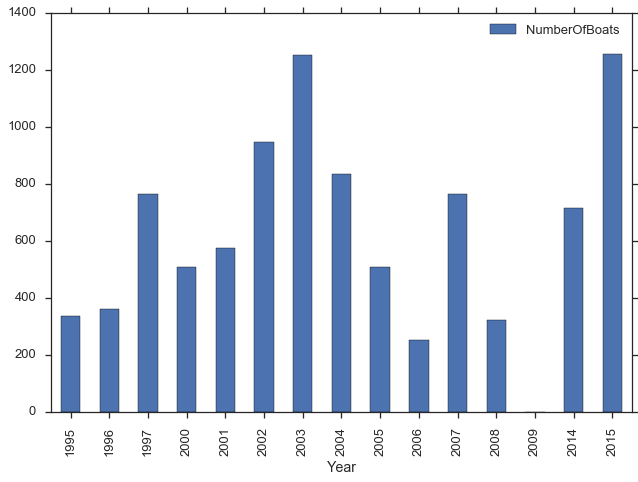

In [10]:
#By year
#graphs matplotlib
byYear.plot(kind='bar')

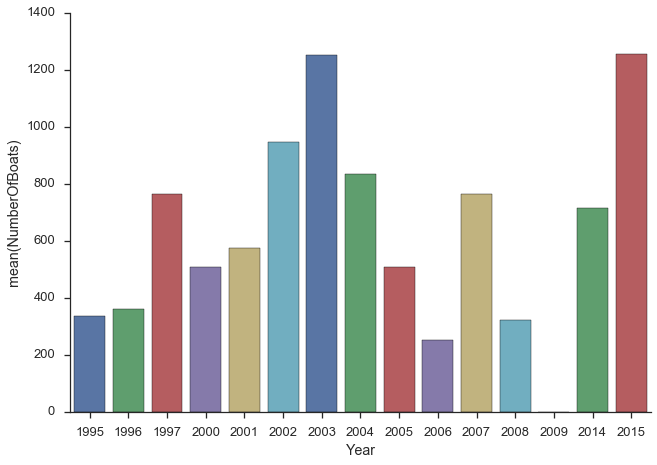

In [28]:
#make some plots with seaborn
sns.set(style="ticks", context="talk")
# Set up the matplotlib figure
current_palette = sns.color_palette()
g = sns.barplot(x=byYear.index, y="NumberOfBoats", palette=sns.color_palette(current_palette), data=byYear, ci="None")
sns.despine()



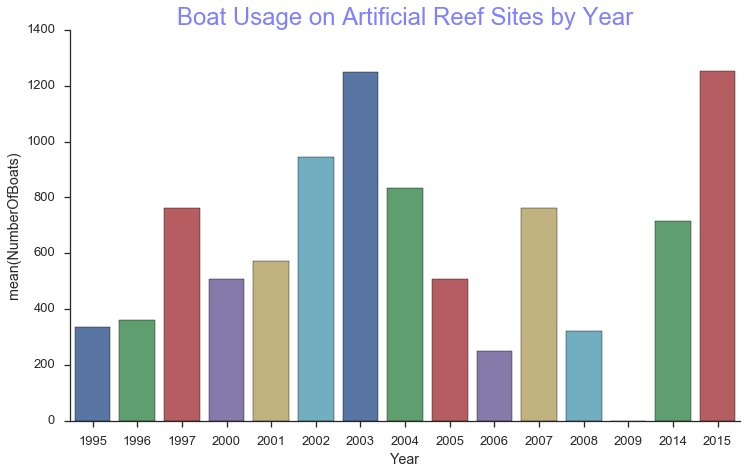

In [31]:
#make some plots with seaborn
sns.set(style="ticks", context="talk")
# Set up the matplotlib figure
current_palette = sns.color_palette()
g = sns.barplot(x=byYear.index, y="NumberOfBoats", palette=sns.color_palette(current_palette), data=byYear, ci="None")
sns.despine()
g.figure.set_size_inches(12,7)
g.axes.set_title("Boat Usage on Artificial Reef Sites by Year", fontsize=24, color="b",alpha=0.5)

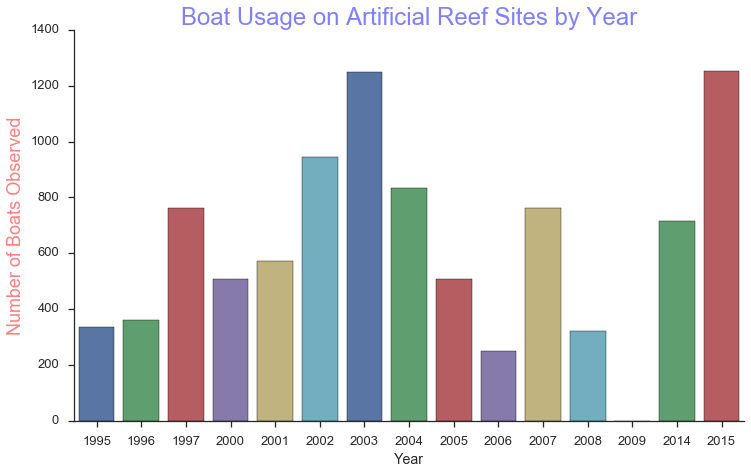

In [6]:
#make some plots with seaborn
sns.set(style="ticks", context="talk")
# Set up the matplotlib figure
current_palette = sns.color_palette()
g = sns.barplot(x=byYear.index, y="NumberOfBoats", palette=sns.color_palette(current_palette), data=byYear, ci="None")
sns.despine()

g.figure.set_size_inches(12,7)
g.axes.set_title("Boat Usage on Artificial Reef Sites by Year", fontsize=24, color="b",alpha=0.5)

g.set_ylabel("Number of Boats Observed",size = 18,color="r",alpha=0.5)

In [14]:
byReefType = boatCount.groupby(['Reef', 'BoatType']).sum()
byReefType.head()

NumberOfBoats
Reef           BoatType               
Atlantic Beach Large              69.0
               Small            1406.0
Fire Island    Large             124.0
               Small             933.0
Hempstead      Large              79.0

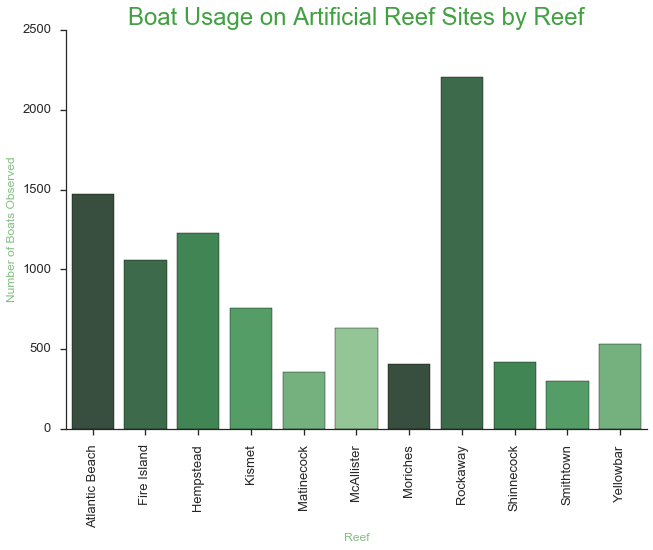

In [77]:
g = sns.barplot(x=byReefType.index.levels[0], y="NumberOfBoats", palette=sns.color_palette(current_palette), data=byReef, ci="None")
sns.despine()

g.axes.set_title("Boat Usage on Artificial Reef Sites by Reef", fontsize=24, color="g",alpha=0.75)

g.set_xlabel("Reef", size=12, color="g", alpha=0.5)
g.set_ylabel("Number of Boats Observed",size = 12,color="g",alpha=0.5)
g.set_xticklabels(byReefType.index.levels[0],rotation=90, rotation_mode="default")

In [80]:
g = sns.barplot(x=byReefType.index.levels[0], y="NumberOfBoats", hue=byReefType.index.levels[1], palette=sns.color_palette(current_palette), data=byReef, ci="None")
sns.despine()

g.axes.set_title("Boat Usage on Artificial Reef Sites by Reef", fontsize=24, color="g",alpha=0.75)

g.set_xlabel("Reef", size=12, color="g", alpha=0.5)
g.set_ylabel("Number of Boats Observed",size = 12,color="g",alpha=0.5)
g.set_xticklabels(byReefType.index.levels[0],rotation=90, rotation_mode="default")

AssertionError: Grouper and axis must be same length

In [79]:
byReefType.index.levels[1]


Index([u'Large', u'Small'], dtype='object', name=u'BoatType')